<a href="https://colab.research.google.com/github/hr1378/ML-Projects/blob/main/02_neural_network_classification_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
!apt-get install git

# Configure Git with your GitHub user details
!git config --global user.name "hr1378"
!git config --global user.email "hr1378#g.rit.edu"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
(train_data,train_labels),(testdata,testlabels)=fashion_mnist.load_data()
print(f"Traing sample:\{train_data[0]}\n")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Traing sample:\[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64

In [ ]:
print(f"Traing label:\n{train_labels[0]}\n")

Traing label:
9



In [ ]:
train_labels[7]

2

In [ ]:
classnames=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [ ]:
len(classnames)

10

In [ ]:
index=87

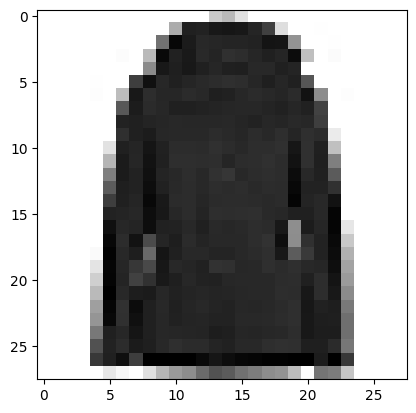

In [ ]:
plt.imshow(train_data[2000],cmap=plt.cm.binary)

In [ ]:
import random

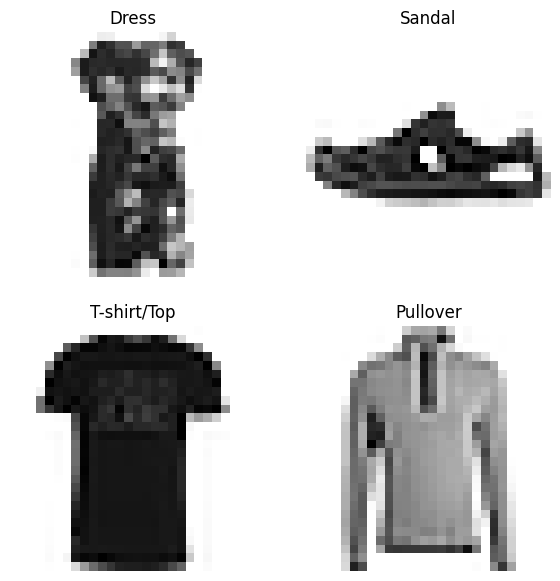

In [ ]:
plt.figure(figsize=(7,7))
for i in range (4):
  ax=plt.subplot(2,2,i+1)
  randind=random.choice(range(len(train_data)))
  plt.imshow(train_data[randind],cmap=plt.cm.binary)
  plt.title(classnames[train_labels[randind]])
  plt.axis(False)

In [ ]:
flat=tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28,28))])
flat.output_shape


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [ ]:
28*28

784

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model1.fit(train_data,
           tf.one_hot(train_labels,depth=10),
           epochs=10,
           validation_data=(testdata,tf.one_hot(testlabels,depth=10))
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0990 - loss: 2.4001 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
train=train_data/255.0
test=testdata/255.0
train.min(),train.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history=model2.fit(train,train_labels,epochs=10,verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3121 - loss: 1.7967
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5713 - loss: 1.0014
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6512 - loss: 0.8738
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7516 - loss: 0.7391
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7850 - loss: 0.6499
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7959 - loss: 0.6131
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8008 - loss: 0.5945
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8043 - loss: 0.5828
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8081 - loss: 0.5745
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8089 - loss: 0.5683


In [ ]:
!nvidiasmi

/bin/bash: line 1: nvidiasmi: command not found


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
train.min(),train.max()

(0.0, 1.0)

<Axes: title={'center': ' norm'}>

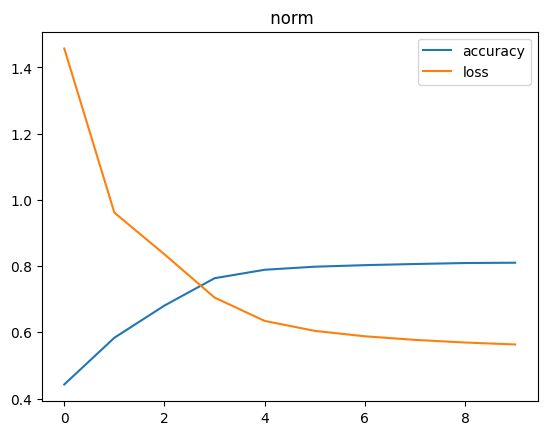

In [ ]:
pd.DataFrame(history.history).plot(title=" norm")

In [ ]:
tf.random.set_seed(42)

In [ ]:
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer="adam",
               metrics=['accuracy'])
lrscheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
find_bstlr_history=model3.fit(train,train_labels,epochs=40,validation_data=(test,testlabels),
                              callbacks=[lrscheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4196 - loss: 1.5925 - val_accuracy: 0.6979 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7161 - loss: 0.8351 - val_accuracy: 0.7511 - val_loss: 0.7197 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7527 - loss: 0.6977 - val_accuracy: 0.7569 - val_loss: 0.6778 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7630 - loss: 0.6587 - val_accuracy: 0.7650 - val_loss: 0.6569 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7727 - loss: 0.6369 - val_accuracy: 0.7725 - val_loss: 0.6443 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7794 - loss: 0.6227 - val_accuracy: 0.7796 - val_loss: 0.6342 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7842 - l

Text(0.5, 1.0, 'lrs')

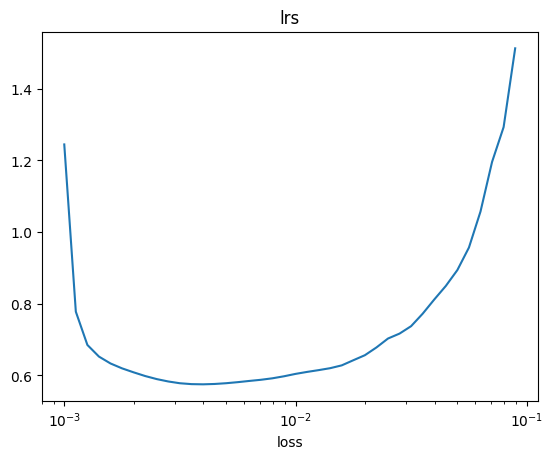

In [ ]:
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_bstlr_history.history["loss"])
plt.xlabel("loss")
plt.title("lrs")

In [ ]:
10**-3

0.001

In [ ]:
model4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')
])
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

history4=model4.fit(train,
                    train_labels,
                    epochs=20,
                    validation_data=(test,testlabels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4807 - loss: 1.4324 - val_accuracy: 0.7058 - val_loss: 0.8185
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7180 - loss: 0.7738 - val_accuracy: 0.7412 - val_loss: 0.7510
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7433 - loss: 0.7169 - val_accuracy: 0.7518 - val_loss: 0.7176
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7554 - loss: 0.6871 - val_accuracy: 0.7571 - val_loss: 0.6973
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7633 - loss: 0.6678 - val_accuracy: 0.7620 - val_loss: 0.6841
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7681 - loss: 0.6538 - val_accuracy: 0.7662 - val_loss: 0.6729
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7724 - loss: 0.6424 - val_accuracy: 0.7674 - val_loss: 0.6643
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7770 - loss: 0.6330 - 